In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean, cityblock
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegressionCV
from collections import defaultdict
from scipy.optimize import curve_fit
sns.set(style="whitegrid")


raw = pd.read_csv('METABRIC_RNA_Mutation.csv', low_memory=False)

# Survival Analysis of Breast Cancer Patients using Gene Expression Profiles

#### Asian Institute of Management | Machine Learning 1 Project | Ralph Mattew L. Palomaria

## 1 Abstract

## 2 Introduction

Cancer is an uncrontrolled growth of abnormal cells in the body. Breast cancer is the type of cancer developing from the breast. Breast cancer is most frequent cancer among women, impacting 2.1 million women each year. In 2018, it is estimated that 627,000 women died from breast cancer. 

In cinical decision-making, it is important to accurately predict how patients repond to treatments in order to optimize resources, adjust the prognosis accordingly, and make the treatment more individualized. Breast cancer patients with the same stage of the disease and the same clinical characteristics can have different treatment responses and overall survival due to genetic factors. Cancers are due to genetic abnormalities or mutations. One way to measure genetic expression is by genetic profiling which can be done in several ways, e.g. DNA microarray. Comparing genetic expresions in normal and cancerous cell gives  insights about prognosis and outcomes.

There are numerous studies undertaken to predict survivability of breast cancer patients using clinical data. Few studies used data mining and machine learning tools to predict the outcomes usign the clinical attributes. In this study, both clinical and genetic data were used to predict the survivability of breast cancer patienst at a given time. 

This study aims to answer these two key questions:
- **(1)** What are the top predictors for breast cancer patient's survival
- **(2)** What is the probability that a patient will survive in the next $t$ years given his/her clinical and genetic features.


## 3 Data Description

The dataset used in this study was originally collected by  Professor Carlos Caldas from Cambridge Research Institute and Professor Sam Aparicio from the British Columbia Cancer Centre in Canada and published on Nature Communications (Pereira et al., 2016). The dataset was publicly posted in Kaggle for open competition.

The dataset consists of 
- 31 clinical attributes such as patient's age, tumor stage, size, cancer type etc.
- 331 genetic attributes which represents the mRNA Z-scores obtained from genetic profiles
- 175 genetic mutations

There are a total of 1980 samples. The description of the features are given below:
- `patient_id` - Patient ID
- `ageatdiagnosis` - Age of the patient at diagnosis time
- `typeofbreast_surgery` - Breast cancer surgery type: 1- MASTECTOMY (removal of all breast tissue from a breast. 2- BREAST CONSERVING (part of breast that has cancer is removed)
- `cancer_type` - Breast cancer types: 1- Breast Cancer or 2- Breast Sarcoma
- `cancertypedetailed` - Detailed Breast cancer types: 
        - 1- Breast Invasive Ductal Carcinoma 
        - 2- Breast Mixed Ductal and Lobular Carcinoma 
        - 3- Breast Invasive Lobular Carcinoma 
        - 4- Breast Invasive Mixed Mucinous Carcinoma 
        - 5- Metaplastic Breast Cancer
- `cellularity` - Cancer cellularity post chemotherapy (amount of tumor cells in the specimen and their arrangement into clusters)
- `chemotherapy` - Whether or not the patient had chemotherapy as a treatment (yes/no)
- `pam50+claudin-low_subtype` 
        - Pam 50: is a tumor profiling test that helps show whether some estrogen receptor-positive (ER-positive)
        - HER2-negative breast cancers are likely to metastasize (when breast cancer spreads to other organs). 
        - Claudin-low breast cancer subtype is defined by gene expression characteristics
- `cohort` - Cohort is a group of subjects who share a defining characteristic (It takes a value from 1 to 5)
- `erstatusmeasuredbyihc`	- To assess if estrogen receptors are expressed on cancer cells by using immune-histochemistry (a dye used in pathology that targets specific antigen, if it is there, it will give a color, it is not there, the tissue on the slide will be colored) (positive/negative)
- `er_status`	- Cancer cells are positive or negative for estrogen receptors
- `neoplasmhistologicgrade` - Determined by pathology by looking the nature of the cells, do they look aggressive or not (It takes a value from 1 to 3)
- `her2statusmeasuredbysnp6` - To assess if the cancer positive for HER2 or not by using advance molecular techniques (Type of next generation sequencing)
- `her2_status` - Whether the cancer is positive or negative for HER2
- `tumorotherhistologic_subtype` - Type of the cancer based on microscopic examination of the cancer tissue.It takes a value of 'Ductal/NST', 'Mixed', 'Lobular', 'Tubular/ cribriform', 'Mucinous', 'Medullary', 'Other', 'Metaplastic'
- `hormone_therapy` - Whether or not the patient had hormonal as a treatment (yes/no)
- `inferredmenopausalstate` - Whether the patient is is post menopausal or not (post/pre)
- `integrative_cluster` - Molecular subtype of the cancer based on some gene expression (It takes a value from '4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6')
- `primarytumorlaterality` - Whether it is involving the right breast or the left breast
- `lymphnodesexamined_positive` - To take samples of the lymph node during the surgery and see if there were involved by the cancer
- `mutation_count` - Number of gene that has relevant mutations
- `nottinghamprognosticindex`	- It is used to determine prognosis following surgery for breast cancer. Its value is calculated using three pathological criteria: the size of the tumour; the number of involved lymph nodes; and the grade of the tumour.
- `oncotree_code` - The OncoTree is an open-source ontology that was developed at Memorial Sloan Kettering Cancer Center (MSK) for standardizing cancer type diagnosis from a clinical perspective by assigning each diagnosis a unique OncoTree code.
- `overallsurvivalmonths`	- Duration from the time of the intervention to death
- `overall_survival` -Target variable wether the patient is alive of dead.
- `pr_status` - Cancer cells are positive or negative for progesterone receptors
- `radio_therapy`	- Whether or not the patient had radio as a treatment (yes/no)
- `3-geneclassifiersubtype` - Three Gene classifier subtype It takes a value from 'ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif','HER2+'
- `tumor_size` - Tumor size measured by imaging techniques
- `tumor_stage` - Stage of the cancer based on the involvement of surrounding structures, lymph nodes and distant spread
- `deathfromcancer` - Wether the patient's death was due to cancer or not (yes/no)    
<br>

In this study, the target feature is `overall_survival` which takes value of `0` and `1`, indicating whether the patient is still survival or not.

## 4 Methodology

The over-all methodology is laid-out in Figure N.n. Though the data was already given in a structured form, several features need to be removed, combined and encoded in preparation for machine learning. The first step is data cleaning. Those patients who died from other diseases were removed since they numbers must not be acocunted to the probability of non-sruvival from breast cancer.

Part of data cleaning is removal of irrelevant and redundant features. Irrelevant features such as `patient_id` was removed. Also, redundant features such as `cancer_type` (redundant with `detailed_cancer_type`) and `er_status_measured_by_ihc` were removed. 

Categorical ordinal subtype features such as `cellularity` was mapped by manual labeling.

Missing values for most categorical ordinal subtype data were imputed byy their most frequent value. For numerical continuous subtype such as `tumor_size`, missing values were imputed by the mean.

Erroneous entries were also identified. For erroneous entries, values were replaced by the most common value in the dataset.

Several collinearities were observed from the dataset. For example, the feature `nottingham_prognosic_index` is derived from several features such as size of the tumor  and  the number of lymph nodes. Such features were also removed based on a correlation threshold of 0.6.

Some numerical continuous subtype faetures such as `age` and `tumor_size` were found to have positively skewed distribution. Thus, logarithmic transformation was used improve the skewness of `age` and `tumor_size`.

The second step involves time discretization of the dataset. The objective of time discretization is to formulate a logistic model for each discrete time intervals. Further discussions about the resulting model are given in the results and discussion section. The dataset was divided into seven (7) subsamples named: $t\leq2, t\leq3, t\leq4, t\leq5, t\leq6, t\leq7, t\leq8, t\leq9$. Each subsample underwent the same  dimensionality reduction technique and machine learning algorithm.

The third step is dimensionality reduction. Due to data sparsity, Singular Value Decomposition (SVD) was used to reduce the number of features for the logistic regression classifier. The number of singular vectors were determined based on 90% cumulative variance explained. The graphs of cumulative variances are shown in the results and discussion.

The fourth step involves running the Logistic Regression Classifier. In this study, I used the sklearn `LogisticRegressionCV` which has  built-in cross validation. I used 20-folds cross-validation to ensure minimum bias due to highly imbalanced dataset. Also, the accuracy metric used was AUC-ROC due to high imbalance in the classes. The penalty used as `L2` and the solver used was `liblinear` for 1000 iterations. Each subset was fitted with one logistic regression classifier.

The fifth step involves probability predictions of the samples in each subset. Each fitted logistic model was used to calculate the probabilities of the samples  in each subset. This was carried out using the `predict_proba` method of the fitted logistic model.

The last step involves the mathematical derivation of the probability model for $t+\Delta t$. From the fitted logistic model, the weights of each feature from each singular vector were included. The time derivative was calculated and the resulting logistic model for $t+\Delta t$ was derived using linear approximation. The mathematical formulation are presented in the results and discussion.

## 5 Implementation and Discussion of Results

In [467]:
def pre_process(df):
    """Performs all pre-processing steps including imputation, mapping and
    log-transformation."""
    
    df = raw[raw['death_from_cancer'] != 
             'Died of Other Causes'].iloc[:, :515].copy()                           ## remove patients died from other causes
    df.drop(columns=['death_from_cancer'], inplace=True)

    ## remove irrelevant and redundant features
    df.drop(columns=['patient_id', 'cancer_type', 
                     'er_status_measured_by_ihc', 'her2_status'], inplace=True)

    ## map cellularity
    cellularity_map = {'High': 3, 'Moderate': 2, 'Low': 1}
    df['cellularity'] = df['cellularity'].map(cellularity_map)

    ## impute missing values
    df['neoplasm_histologic_grade'].fillna(
        df['neoplasm_histologic_grade'].value_counts().index[0], inplace=True)     ## most frequent
    df['mutation_count'].fillna(df['mutation_count'].value_counts().index[0],
                                inplace=True)
    df['tumor_size'].fillna(df['tumor_size'].mean(), inplace=True)                 ## mean
    df['tumor_stage'].fillna(df['tumor_stage'].value_counts().index[0], 
                             inplace=True)
    df['cellularity'].fillna(df['cellularity'].value_counts().index[0], 
                             inplace=True)

    ## handing of wrong entries
    df = df.replace('Breast', df['cancer_type_detailed'].value_counts().index[0])

    ## logarithmic transformation of continuous numerical features
    df['log_age'] = (df['age_at_diagnosis']+1).transform(np.log)
    df['log_tumor_size'] = (df['tumor_size']+1).transform(np.log)

    df.drop(columns=['age_at_diagnosis', 'tumor_size'], inplace=True)
    return df

def discretize_transform(df):
    """Discretized df into time intervals.
    """
    def discretize(i, x):
        y = x/12
        if y <= i:
            return 1
        else:
            return 0

    for i in range(2, 10):
        df[f'time_bin_{i}'] = df['overall_survival_months'].apply(lambda x: discretize(i, x))
    
    return df

In [468]:
df = discretize_transform(pre_process(df))

In [469]:
## store survival months
survival_months_t2 = df[df[f'time_bin_2']==1]['overall_survival_months']
survival_months_t3 = df[df[f'time_bin_3']==1]['overall_survival_months']
survival_months_t4 = df[df[f'time_bin_4']==1]['overall_survival_months']
survival_months_t5 = df[df[f'time_bin_5']==1]['overall_survival_months']
survival_months_t6 = df[df[f'time_bin_6']==1]['overall_survival_months']
survival_months_t7 = df[df[f'time_bin_7']==1]['overall_survival_months']
survival_months_t8 = df[df[f'time_bin_8']==1]['overall_survival_months']
survival_months_t9 = df[df[f'time_bin_9']==1]['overall_survival_months']

## assign time bins
col_list = ['overall_survival_months', 'time_bin_2', 
            'time_bin_3', 'time_bin_4', 'time_bin_5', 'time_bin_6', 
            'time_bin_7', 'time_bin_8', 'time_bin_9']

df_t2 = df[df[f'time_bin_2']==1].drop(columns=col_list)
df_t3 = df[df[f'time_bin_3']==1].drop(columns=col_list)
df_t4 = df[df[f'time_bin_4']==1].drop(columns=col_list)
df_t5 = df[df[f'time_bin_5']==1].drop(columns=col_list)
df_t6 = df[df[f'time_bin_6']==1].drop(columns=col_list)
df_t7 = df[df[f'time_bin_7']==1].drop(columns=col_list)
df_t8 = df[df[f'time_bin_8']==1].drop(columns=col_list)
df_t9 = df[df[f'time_bin_9']==1].drop(columns=col_list)

In [470]:
## check and filter collinearities among features

s_list = [0]

while len(s_list):
    corr = df_t9.corr()
    col_list2 = corr.columns
    series_dict = {}
    for col in col_list2:
        x = corr.sort_values(by=col, ascending=False)[col].iloc[1:2]
        if x.values > 0.6:
            series_dict[col] = x.index[0]

    unique = set(series_dict.keys()) -set(series_dict.values())
    duplicates = set(series_dict.keys()) -  unique
    
    m = []
    for dup in duplicates:
         if dup not in m:
                m.append(series_dict[dup])
    s_list = m + list(unique)

    df_t2.drop(columns=s_list, inplace=True)
    df_t3.drop(columns=s_list, inplace=True)
    df_t4.drop(columns=s_list, inplace=True)
    df_t5.drop(columns=s_list, inplace=True)
    df_t6.drop(columns=s_list, inplace=True)
    df_t7.drop(columns=s_list, inplace=True)
    df_t8.drop(columns=s_list, inplace=True)
    df_t9.drop(columns=s_list, inplace=True)

In [471]:
## one-hot encode nominal features 

X_t2 = pd.get_dummies(df_t2.drop(columns='overall_survival'))
y_t2 = df_t2['overall_survival']

X_t3 = pd.get_dummies(df_t3.drop(columns='overall_survival'))
y_t3 = df_t3['overall_survival']

X_t4 = pd.get_dummies(df_t4.drop(columns='overall_survival'))
y_t4 = df_t4['overall_survival']

X_t5 = pd.get_dummies(df_t5.drop(columns='overall_survival'))
y_t5 = df_t5['overall_survival']

X_t6 = pd.get_dummies(df_t6.drop(columns='overall_survival'))
y_t6 = df_t6['overall_survival']

X_t7 = pd.get_dummies(df_t7.drop(columns='overall_survival'))
y_t7 = df_t7['overall_survival']

X_t8 = pd.get_dummies(df_t8.drop(columns='overall_survival'))
y_t8 = df_t8['overall_survival']

X_t9 = pd.get_dummies(df_t9.drop(columns='overall_survival'))
y_t9 = df_t9['overall_survival']

In [472]:
## dimensionality reduction by Singuar Value Decomposition

def truncated_svd(X):
    '''Reduce dimensionality of TFIDF Matrix.'''
    q, s, p = np.linalg.svd(X)
    return q, np.diag(s), p.T, s**2/np.linalg.norm(s**2, 1)

q, s, p, nssd = [], [], [], []

X = [X_t2, X_t3, X_t4, X_t5, X_t6, X_t7, X_t8, X_t9]

for x in X:
    qx, sx, px, nssdx = truncated_svd(x)
    q.append(qx)
    s.append(sx)
    p.append(px)
    nssd.append(nssdx)

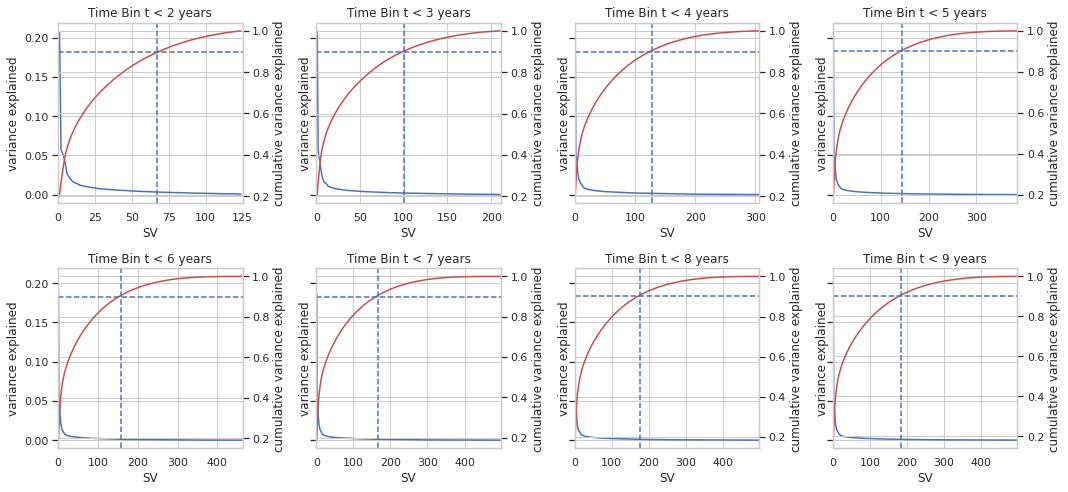

In [473]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

svs = [67, 100, 128, 145, 157, 167, 177, 185]

for i in range(8):
    ax_list[i].plot(range(1, len(nssd[i])+1), nssd[i], '-', label='individual')
    ax_list[i].set_xlim(0, len(nssd[i])+1)
    ax_list[i].set_xlabel('SV')
    ax_list[i].set_ylabel('variance explained')
    ax_list[i] = ax_list[i].twinx()
    ax_list[i].plot(range(1, len(nssd[i])+1), nssd[i].cumsum(), 'r-', label='cumulative')
    ax_list[i].axhline(0.9, ls='--', color='b')
    ax_list[i].set_ylabel('cumulative variance explained')
    ax_list[i].axvline(svs[i], ls='--', color='b')
    ax_list[i].set_title(f'Time Bin t < {i+2} years')

plt.tight_layout();

**Figure 5.1** Cumulative Variance Explained from each subset $t\leq2, 3, 4, 5, 6,7,8,9$

**Figure 5.1** shows the graphs of the cumulative variances of Singular Vectors for each subset. At 90% cumulative variance explaiend, the number of SVs selected were  $67, 100, 128, 145, 157, 167, 177, 185$ for subset $t\leq2,3,4,5,6,7,8,9$, respectively. As observed, the number of SV increases since the size of the dataset also increases.

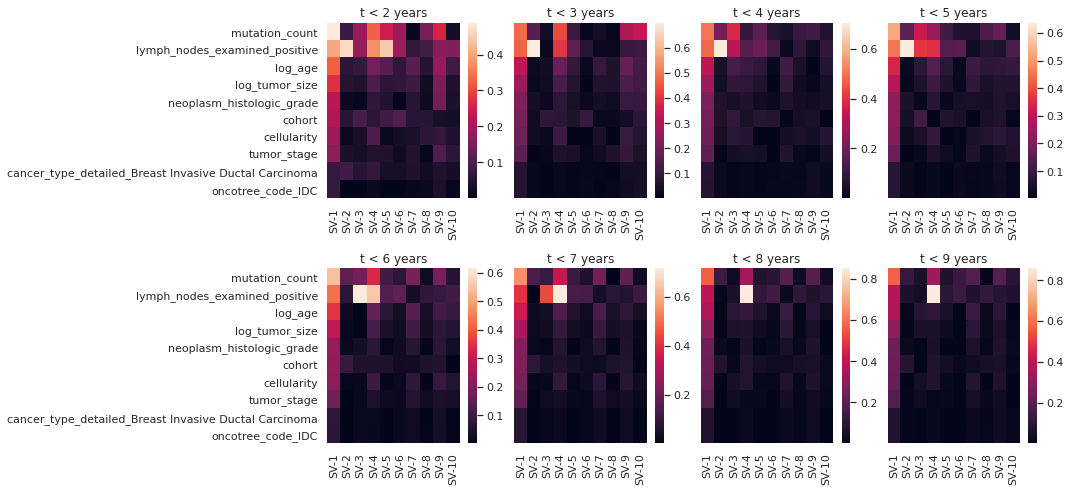

In [474]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
X_reduced = []

for i in range(8):
    svd = TruncatedSVD(n_components=svs[i]).fit(X[i])
    X_reduced.append(svd.transform(X[i]))
    I = np.identity(X[i].shape[1])
    weights = pd.DataFrame(svd.transform(I), index=X[i].columns)
    weights.columns = [f'SV-{i+1}' for i in weights.columns]
    weights = weights.transform(np.abs).copy()
    sns.heatmap(weights.sort_values(by='SV-1', ascending=False).iloc[:10, :10], 
                ax=ax_list[i])
    ax_list[i].set_title(f't < {i+2} years')

plt.tight_layout()

**Figure 5.2** Weights of Singular Vectors for each Subset 

In all subsets, the feature `mutation_count` has the highest weight with up to **60%** variance for the subset $t\leq6$. Thus, this feature could be the top differentiator of the classes. The feature `lymph_nodes_examined_positive` comes in second with up to 50-55% in subsets t\leq5,6. In some subsets, this feature is the top feature for SV-2, SV-3 and SV-4. The next feature in the ranking is the `log_age`, followed by `log_tumor_size`and `neoplasm_histologic_grade`. `Neoplasm_histologic_grade` is a measure of aggresiveness of a cell. It takes a value of 1 to 3, 3 being the most aggressive. Other features on the top 10  also include `cohort`, `cellularity`, `tumor_stage`, `cancer_type_Breast_Invasive_Ductal_Carcinoma` and `oncotree_code_IDC`. The feature `cohort` are grouping of patients based on "similarities" which was not disclosed in the data decription. `cellularity` measures the amount of tumor cells in a patient's specimen post chemotherapy. `tumor_stage` is the same as cancer stage. `oncotree_code_IDC` is a classification of the tumor based  on oncotree coding system.

Based on literatures (Kate and Nadig, 2017), tumor size, positive lymph nodes, tumor stage, and site-specific surgery code are among the top predictors of survivability of breast cancer patients. Thus, the top features found in SVD  are in agreement with other studies. 

In [430]:
## run logistic regression classifier

logic_t2 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045], 
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[0], y_t2)
prob_t2 = pd.DataFrame(logic_t2.predict_proba(X_reduced[0]))
prob_t2['actual'] = list(y_t2)
prob_t2['pred'] = logic_t2.predict(X_reduced[0])

mean_t2, std_t2 = np.mean(logic_t2.scores_[1]), np.std(logic_t2.scores_[1])


logic_t3 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045], 
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[1], y_t3)
prob_t3 = pd.DataFrame(logic_t3.predict_proba(X_reduced[1]))
prob_t3['actual'] = list(y_t3)
prob_t3['pred'] = logic_t3.predict(X_reduced[1])
mean_t3, std_t3 = np.mean(logic_t3.scores_[1]), np.std(logic_t3.scores_[1])


logic_t4 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[2], y_t4)
prob_t4 = pd.DataFrame(logic_t4.predict_proba(X_reduced[2]))
prob_t4['actual'] = list(y_t4)
prob_t4['pred'] = logic_t4.predict(X_reduced[2])
mean_t4, std_t4 = np.mean(logic_t4.scores_[1]), np.std(logic_t4.scores_[1])


logic_t5 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[3], y_t5)
prob_t5 = pd.DataFrame(logic_t5.predict_proba(X_reduced[3]))
prob_t5['actual'] = list(y_t5)
prob_t5['pred'] = logic_t5.predict(X_reduced[3])
mean_t5, std_t5 = np.mean(logic_t5.scores_[1]), np.std(logic_t5.scores_[1])


logic_t6 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[4], y_t6)
prob_t6 = pd.DataFrame(logic_t6.predict_proba(X_reduced[4]))
prob_t6['actual'] = list(y_t6)
prob_t6['pred'] = logic_t6.predict(X_reduced[4])
mean_t6, std_t6 = np.mean(logic_t6.scores_[1]), np.std(logic_t6.scores_[1])


logic_t7 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[5], y_t7)
prob_t7 = pd.DataFrame(logic_t7.predict_proba(X_reduced[5]))
prob_t7['actual'] = list(y_t7)
prob_t7['pred'] = logic_t7.predict(X_reduced[5])
mean_t7, std_t7 = np.mean(logic_t7.scores_[1]), np.std(logic_t7.scores_[1])


logic_t8 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[6], y_t8)
prob_t8 = pd.DataFrame(logic_t8.predict_proba(X_reduced[6]))
prob_t8['actual'] = list(y_t8)
prob_t8['pred'] = logic_t8.predict(X_reduced[6])
mean_t8, std_t8 = np.mean(logic_t8.scores_[1]), np.std(logic_t8.scores_[1])


logic_t9 = LogisticRegressionCV(Cs=[0.0001, 0.0015, 0.002, 0.003, 0.004, 0.0045],
                                cv=20, scoring='roc_auc', penalty='l2', 
                             solver='liblinear', max_iter=1000, n_jobs=-1
                               ).fit(X_reduced[7], y_t9)
prob_t9 = pd.DataFrame(logic_t9.predict_proba(X_reduced[7]))
prob_t9['actual'] = list(y_t9)
prob_t9['pred'] = logic_t9.predict(X_reduced[7])
mean_t9, std_t9 = np.mean(logic_t9.scores_[1]), np.std(logic_t9.scores_[1])

In [475]:
## combine results to the raw data

results_t2 = pd.concat([X_t2, 
                        survival_months_t2, 
                        prob_t2.set_index(X_t2.index)], axis=1)
results_t3 = pd.concat([X_t3, 
                        survival_months_t3,
                        prob_t3.set_index(X_t3.index)], axis=1)
results_t4 = pd.concat([X_t4, 
                        survival_months_t4,
                        prob_t4.set_index(X_t4.index)], axis=1)
results_t5 = pd.concat([X_t5, 
                        survival_months_t5, 
                        prob_t5.set_index(X_t5.index)], axis=1)
results_t6 = pd.concat([X_t6, 
                        survival_months_t6, prob_t6.set_index(X_t6.index)], axis=1)
results_t7 = pd.concat([X_t7, 
                        survival_months_t7, 
                        prob_t7.set_index(X_t7.index)], axis=1)
results_t8 = pd.concat([X_t8, 
                        survival_months_t8, 
                        prob_t8.set_index(X_t8.index)], axis=1)
results_t9 = pd.concat([X_t9, 
                        survival_months_t9, 
                        prob_t9.set_index(X_t9.index)], axis=1)

results_t2['age'] = round(np.exp(results_t2['log_age']))-1
results_t3['age'] = round(np.exp(results_t3['log_age']))-1
results_t4['age'] = round(np.exp(results_t4['log_age']))-1
results_t5['age'] = round(np.exp(results_t5['log_age']))-1
results_t6['age'] = round(np.exp(results_t6['log_age']))-1
results_t7['age'] = round(np.exp(results_t7['log_age']))-1
results_t8['age'] = round(np.exp(results_t8['log_age']))-1
results_t9['age'] = round(np.exp(results_t9['log_age']))-1

results_t2['tumor_size'] = round(np.exp(results_t2['log_tumor_size']))-1
results_t3['tumor_size'] = round(np.exp(results_t3['log_tumor_size']))-1
results_t4['tumor_size'] = round(np.exp(results_t4['log_tumor_size']))-1
results_t5['tumor_size'] = round(np.exp(results_t5['log_tumor_size']))-1
results_t6['tumor_size'] = round(np.exp(results_t6['log_tumor_size']))-1
results_t7['tumor_size'] = round(np.exp(results_t7['log_tumor_size']))-1
results_t8['tumor_size'] = round(np.exp(results_t8['log_tumor_size']))-1
results_t9['tumor_size'] = round(np.exp(results_t9['log_tumor_size']))-1

Text(0.5, 1.0, 'Mean AUC-ROC')

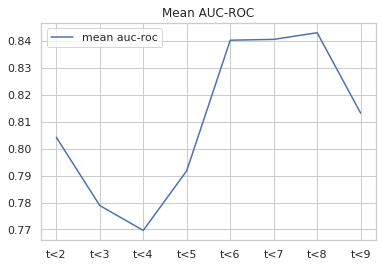

In [476]:
## display mean and std for auc-roc scores

pd.DataFrame([mean_t2, mean_t3, mean_t4, mean_t5, mean_t6, mean_t7, mean_t8, 
              mean_t9], index=['t<2', 't<3', 't<4', 't<5', 't<6', 't<7', 
                               't<8', 't<9'], columns=['mean auc-roc']).plot(kind='line')
plt.title('Mean AUC-ROC')

**Figure 5.3** Mean AUC-ROC for different Subsets

In [477]:
svs = [67, 100, 128, 145, 157, 167, 177, 185]

# ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
# X_reduced = []

logic_fit_list = [logic_t2, logic_t3, logic_t4, logic_t5, logic_t6, logic_t7,
                 logic_t8, logic_t9]
w_ij_list = []
beta_list = []
coefficients_list = []

for i in range(8):
    svd = TruncatedSVD(n_components=svs[i]).fit(X[i])
    I = np.identity(X[i].shape[1])
    weights = pd.DataFrame(svd.transform(I), index=X[i].columns)
    weights.columns = [f'SV-{i+1}' for i in weights.columns]
    weights = weights.transform(np.abs).copy()
    w_ij = weights.sort_values(by='SV-1', ascending=False).iloc[:10, :10].values
    beta = logic_fit_list[i].coef_[0][:10]
    coefficients = w_ij.dot(beta)
    w_ij_list.append(w_ij)
    beta_list.append(beta)
    coefficients_list.append(coefficients)

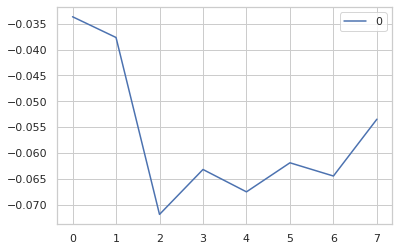

In [478]:
pd.DataFrame(np.vstack(coefficients_list)[:, 2]).plot(kind='line')
# np.vstack(coefficients_list)

In [482]:
# df_mc = pd.concat([results_t2[['mutation_count', 1]].groupby('mutation_count').mean(),
# results_t3[['mutation_count', 1]].groupby('mutation_count').mean(),
# results_t4[['mutation_count', 1]].groupby('mutation_count').mean(),
# results_t5[['mutation_count', 1]].groupby('mutation_count').mean(), 
# results_t6[['mutation_count', 1]].groupby('mutation_count').mean(),
# results_t7[['mutation_count', 1]].groupby('mutation_count').mean(),
# results_t8[['mutation_count', 1]].groupby('mutation_count').mean()], axis=1)
# df_mc.columns = ['less than 2 years', 'less than 3 years', 'less than 4 years', 
#               'less than 5 years', 'less than 6 years', 'less than 7 years',
#              'less than 8 years', 'less than 9 years']

In [483]:
probt2 = results_t2[1]
probt3 = results_t3[1]
probt4 = results_t4[1]
probt5 = results_t5[1]
probt6 = results_t6[1]
probt7 = results_t7[1]
probt8 = results_t8[1]
probt9 = results_t9[1]

concat = pd.concat([results_t9, probt2, probt3, probt4, probt5, probt6, probt7, probt8], axis=1)
concat.columns = concat.columns.to_list()[:-7] + ['t2_1', 't3_1', 't4_1', 't5_1', 't6_1', 't7_1', 't8_1']

In [484]:
# concat

In [485]:
## mutation count

df_mc = pd.concat([results_t2[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t3[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t4[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t5[['mutation_count', 1]].groupby('mutation_count').mean(), 
results_t6[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t7[['mutation_count', 1]].groupby('mutation_count').mean(),
results_t8[['mutation_count', 1]].groupby('mutation_count').mean(),
                  results_t9[['mutation_count', 1]].groupby('mutation_count').mean()], axis=1)

df_mc.columns = ['less than 2 years', 'less than 3 years', 'less than 4 years', 
              'less than 5 years', 'less than 6 years', 'less than 7 years',
             'less than 8 years', 'less than 9 years']

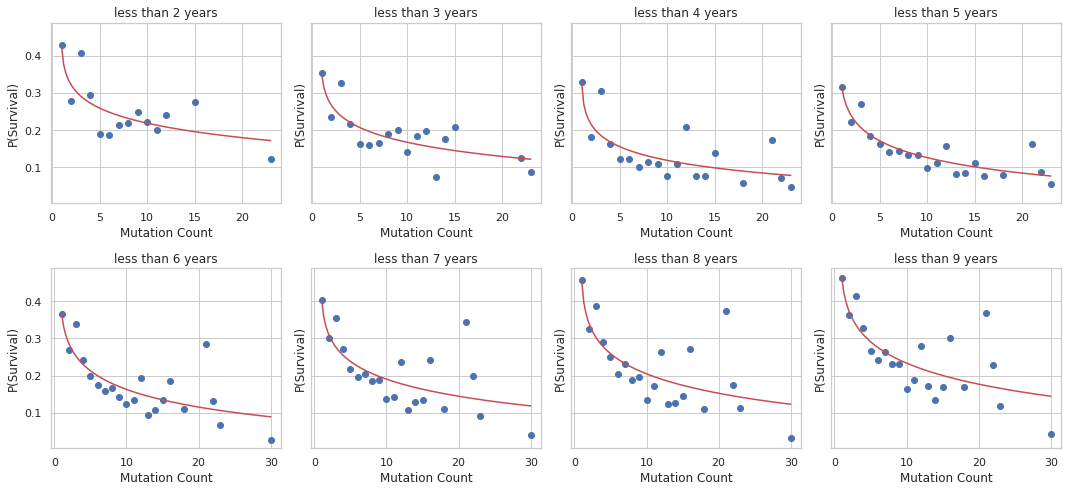

In [486]:
from scipy.stats import gamma

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

def gamma_cdf(x, a, s, l):
    return 1 - gamma.cdf(x, a=a, loc=l, scale=s)

ssr_list_mc = []
popt_list_mc = []

for i in range(2, 10):
    x = df_mc[f'less than {i} years'].dropna().index.values
    y = df_mc[f'less than {i} years'].dropna().values
    
    popt, pcov = curve_fit(gamma_cdf, x, y, p0 = [1, 1, 0])

    ssr_list_mc.append(sum((y - gamma_cdf(x, *popt))**2))
    popt_list_mc.append(popt)
    
    x_range = np.linspace(min(x), max(x), 100)

    ax_list[i-2].plot(x_range, gamma_cdf(x_range, *popt), 'r-')
    ax_list[i-2].scatter(x, y)
    ax_list[i-2].set_title(f"less than {i} years")
    ax_list[i-2].set_xlabel('Mutation Count')
    ax_list[i-2].set_ylabel('P(Survival)')
    
plt.tight_layout()

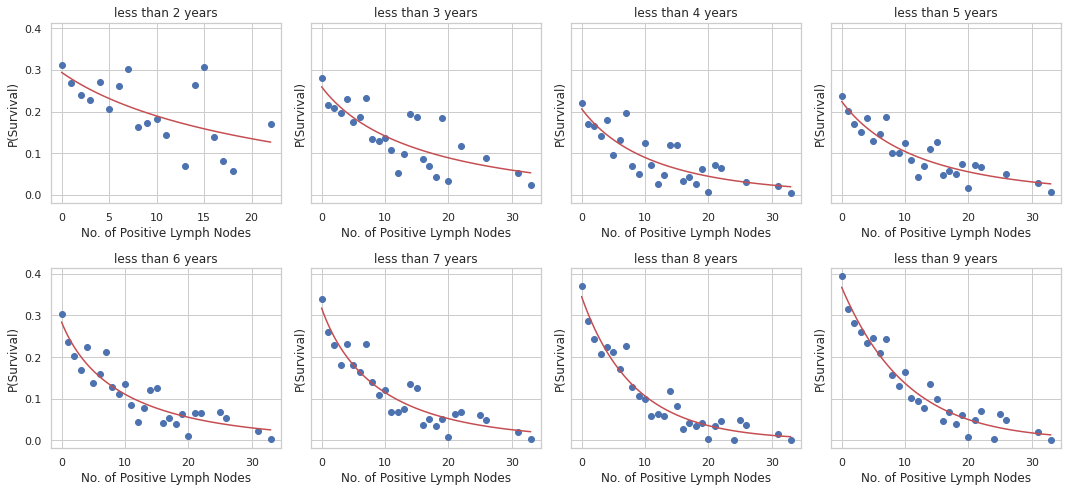

In [487]:
## lymph nodes examined

df_ln = pd.concat([results_t2[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t3[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t4[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t5[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(), 
results_t6[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t7[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
results_t8[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean(),
                  results_t9[['lymph_nodes_examined_positive', 1]].groupby('lymph_nodes_examined_positive').mean()], axis=1)
df_ln.columns = ['less than 2 years', 'less than 3 years', 'less than 4 years', 
              'less than 5 years', 'less than 6 years', 'less than 7 years',
             'less than 8 years', 'less than 9 years']

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,7), sharey=True)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]


ssr_list_ln = []
popt_list_ln = []

for i in range(2, 10):
    x = df_ln[f'less than {i} years'].dropna().index.values
    y = df_ln[f'less than {i} years'].dropna().values
    
    popt, pcov = curve_fit(gamma_cdf, x, y, p0 = [1, 1, 0])

    ssr_list_ln.append(sum((y - gamma_cdf(x, *popt))**2))
    popt_list_ln.append(popt)
    
    x_range = np.linspace(min(x), max(x), 100)

    ax_list[i-2].plot(x_range, gamma_cdf(x_range, *popt), 'r-')
    ax_list[i-2].scatter(x, y)
    ax_list[i-2].set_title(f"less than {i} years")
    ax_list[i-2].set_xlabel('No. of Positive Lymph Nodes')
    ax_list[i-2].set_ylabel('P(Survival)')
    
plt.tight_layout()

Text(0.5, 0, 'Mutation Count')

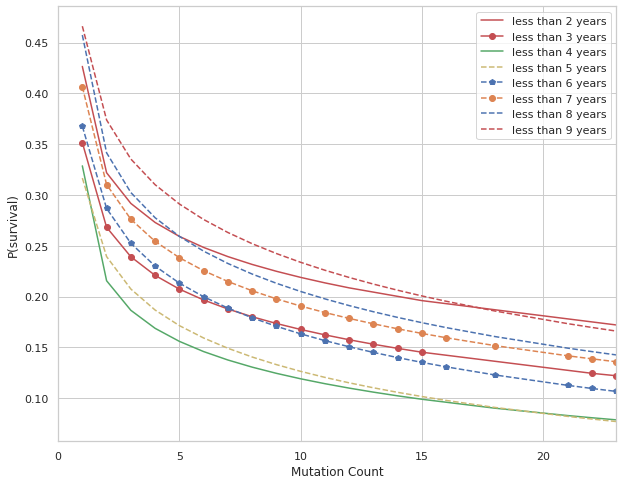

In [488]:
style = ['r-', 'ro-', 'g-', 'y--', 'p--', 'o--', 'b--', 'r--', 'r-']
fig, ax = plt.subplots(figsize=(10,8))

for i in range(2, 10):
    ax.plot(df_mc[f'less than {i} years'].dropna().index.values, 
                gamma_cdf(df_mc[f'less than {i} years'].dropna().index.values, 
                          popt_list_mc[i-2][0], popt_list_mc[i-2][1], 
                          popt_list_mc[i-2][2]), style[i-2], label=f'less than {i} years')
#     ax.set_label(f'less than {i} years')
    
ax.legend()
ax.set_xlim(0, 23)

ax.set_ylabel('P(survival)')
ax.set_xlabel('Mutation Count')

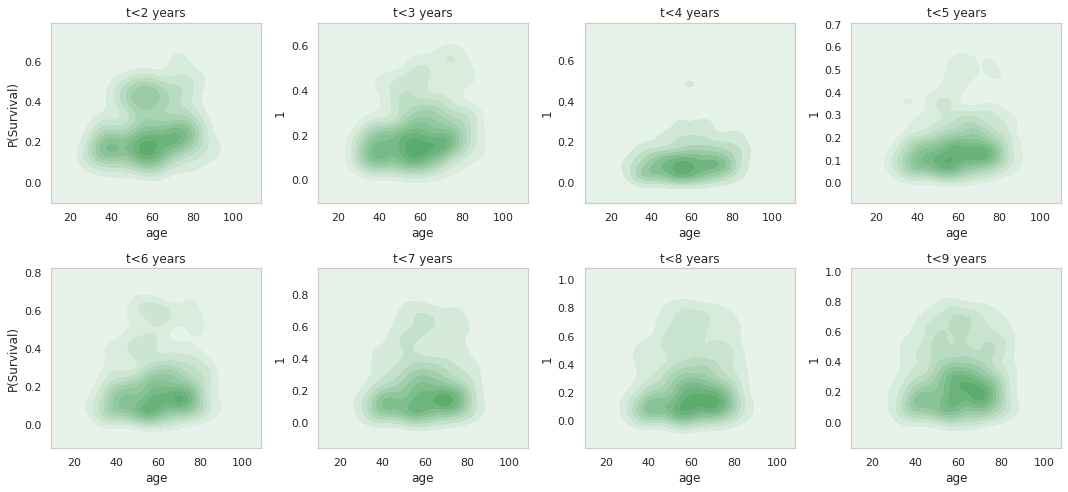

In [529]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, figsize=(15, 7))
# g = sns.FacetGrid(results_t9, col="cellularity", height=4)
# g = sns.jointplot(x='age', y=1, data=results_t9, kind="kde", space=0, color="g")
# sns.jointplot(x='age', y=1, data=results_t8, kind="kde", space=0, color="b")
# sns.jointplot(x='age', y=1, data=results_t7, kind="kde", space=0, color="b", shade_lowest=True)

# g.ax_marg_x.set_axis_off()
# g.ax_marg_y.set_axis_off()

# sns.set(style="darkgrid")
sns.kdeplot(data=results_t2['age'], data2=results_t2[1], color="g", shade=True, ax=ax1)
sns.kdeplot(data=results_t3['age'], data2=results_t3[1], color="g", shade=True, ax=ax2)
sns.kdeplot(data=results_t4['age'], data2=results_t4[1], color="g", shade=True, ax=ax3)
sns.kdeplot(data=results_t5['age'], data2=results_t5[1], color="g", shade=True, ax=ax4)
sns.kdeplot(data=results_t6['age'], data2=results_t6[1], color="g", shade=True, ax=ax5)
sns.kdeplot(data=results_t7['age'], data2=results_t7[1], color="g", shade=True, ax=ax6)
sns.kdeplot(data=results_t8['age'], data2=results_t8[1], color="g", shade=True, ax=ax7)
sns.kdeplot(data=results_t9['age'], data2=results_t9[1], color="g", shade=True, ax=ax8)

ax1.set_title("t<2 years")
ax1.set_ylabel("P(Survival)")
ax2.set_title("t<3 years")

ax3.set_title("t<4 years")

ax4.set_title("t<5 years")

ax5.set_title("t<6 years")

ax5.set_ylabel("P(Survival)")
ax6.set_title("t<7 years")

ax7.set_title("t<8 years")

ax8.set_title("t<9 years")

plt.tight_layout()

Text(0.5, 1.0, 'Tumor Stage and Cellularity')

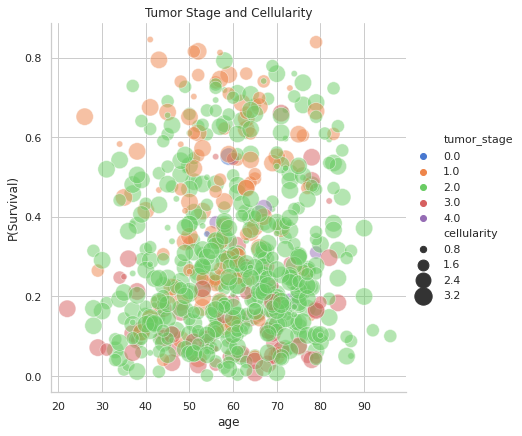

In [531]:
# results_t9['neoplasm_histologic_grade']
# data = results_t9[['age', 'neoplasm_histologic_grade', 1]]

# sns.scatterplot(x='mutation_count', y=1,
#                 hue="tumor_stage",
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), hue_order=[1, 2, 3],
#                 linewidth=0,
#                 data=concat)

sns.relplot(x="age", y=1, hue="tumor_stage", size="cellularity",
            sizes=(40, 300), alpha=.5, palette="muted",
            height=6, data=concat)
plt.ylabel('P(Survival)')
plt.title('Tumor Stage and Cellularity')

Text(50.95358593750001, 0.5, 'P(Survival)')

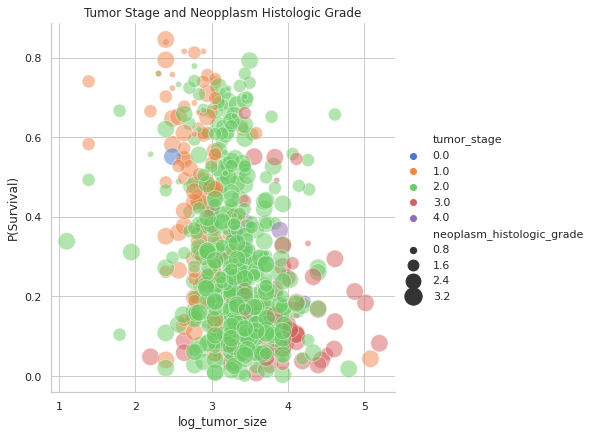

In [528]:
sns.relplot(x="log_tumor_size", y=1, hue="tumor_stage", size="neoplasm_histologic_grade",
            sizes=(40, 300), alpha=.5, palette="muted",
            height=6, data=concat)
plt.title('Tumor Stage and Neopplasm Histologic Grade')
plt.ylabel('P(Survival)')

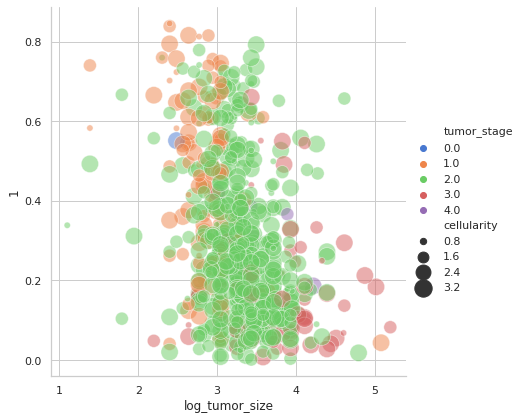

In [492]:
sns.relplot(x="log_tumor_size", y=1, hue="tumor_stage", size="cellularity",
            sizes=(40, 300), alpha=.5, palette="muted",
            height=6, data=concat)


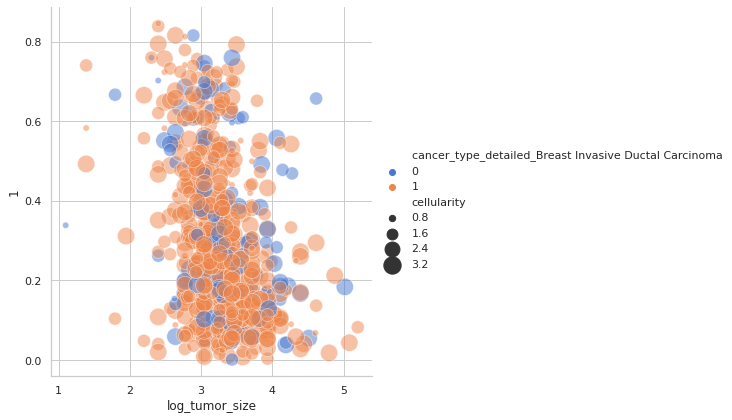

In [493]:
sns.relplot(x="log_tumor_size", y=1, hue="cancer_type_detailed_Breast Invasive Ductal Carcinoma", size="cellularity",
            sizes=(40, 300), alpha=.5, palette="muted",
            height=6, data=concat)

In [509]:
t = concat.dropna()[['t2_1', 't3_1', 't4_1', 't5_1', 't6_1', 't7_1', 't8_1']].T
t['x'] = [2, 3, 4,  5, 6, 7, 8]
t[]

,5,30,40,43,50,58,64,70,80,86,...,1824,1832,1858,1859,1865,1870,1878,1885,1895,x
t2_1,0.359096,0.225984,0.391167,0.450879,0.631427,0.437840,0.483864,0.451210,0.241341,0.459354,...,0.275269,0.205677,0.202318,0.202302,0.213513,0.084953,0.153866,0.136730,0.154461,2
t3_1,0.264362,0.212783,0.373055,0.451925,0.574575,0.373649,0.440038,0.341058,0.192709,0.492904,...,0.208859,0.144115,0.151907,0.144958,0.185505,0.055058,0.114988,0.103483,0.092913,3
t4_1,0.157095,0.138913,0.405611,0.473726,0.684868,0.330946,0.433433,0.380099,0.178490,0.543888,...,0.226893,0.072292,0.094311,0.056538,0.114629,0.028884,0.060015,0.027811,0.043678,4
t5_1,0.233842,0.196272,0.383192,0.428886,0.609882,0.335167,0.422531,0.336956,0.192849,0.483308,...,0.140135,0.111041,0.120143,0.101634,0.163661,0.037300,0.087772,0.052569,0.051581,5
t6_1,0.294068,0.275312,0.445063,0.455981,0.687926,0.412582,0.450516,0.387586,0.275944,0.563082,...,0.205714,0.137989,0.147794,0.125059,0.141245,0.037061,0.093581,0.040654,0.057712,6
t7_1,0.298936,0.332165,0.458336,0.495188,0.743136,0.446617,0.520633,0.431674,0.374103,0.660475,...,0.245231,0.116979,0.188393,0.131951,0.132438,0.039894,0.085343,0.026249,0.046608,7
t8_1,0.285773,0.342219,0.537769,0.493074,0.816616,0.475805,0.586207,0.428242,0.431808,0.722247,...,0.315905,0.095375,0.211618,0.147847,0.124902,0.035847,0.071115,0.016741,0.037289,8


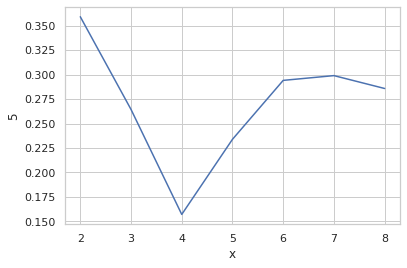

In [518]:


# sns.scatterplot(x='x', y=5,
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), hue_order=[1, 2, 3],
#                 linewidth=0,
#                 data=t)
# sns.scatterplot(x='x', y=30,
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), hue_order=[1, 2, 3],
#                 linewidth=0,
#                 data=t)
# sns.scatterplot(x='x', y=43,
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), hue_order=[1, 2, 3],
#                 linewidth=0,
#                 data=t)
# sns.scatterplot(x='x', y=50,
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), hue_order=[1, 2, 3],
#                 linewidth=0,
#                 data=t)